In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
from IPython.display import HTML

In [16]:
%%javascript
IPython.load_extensions('gist');

<IPython.core.display.Javascript object>

In [17]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

#Integrals and vector calculus

For a real function $f(x)$ in one dimension, we define its integral on an interval $[a,b]$ as the surface area enclosed
by the $x-axis$ and the function itself:

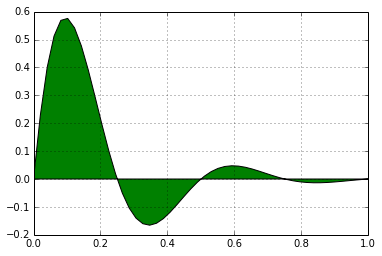

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 1)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

plt.fill(x, y, 'g')
plt.grid(True)
plt.show()


The green area in this plot is the integral on the interval $[0,1]$ with the proviso that *the areas below the $x$-axis contribute with a negative sign.* If the $a>b$, however (the integral runs from right to left), the parts above the $x$-axis count with a negative sign, and those below with a positive one. 

A few properties of integrals are immediately clear:
1. $$\int_a^b f(x) dx = - \int_a^b \left[- f(x) \right] dx.$$
2. $$\int_b^a f(x) dx = -\int_a^b f(x) dx.$$
3. $$\int_a^b f(x) dx  + \int_b^c f(x) dx = \int_a^c f(x) dx $$

#Relation between integral and derivative
Let us calculate the derivative of an integral. We define 
$F(x) = \int_a^x f(y) dy$. Then
$$ \frac{dF(x)}{dx} = \lim_{h \rightarrow 0} \frac{\int_a^{x+h} f(y) dy - \int_a^x f(y) dy}{h}.
$$
From the picture below, you can see that the difference in the denominator is approximately $f(x)h$ (the difference in the numerator is the red area in the graph):

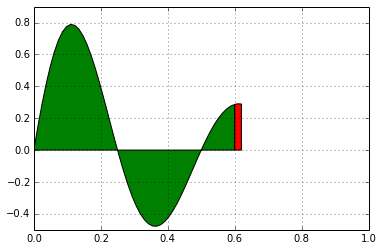

In [19]:
plt.xlim(-0.0, 1.0)
plt.ylim(-0.5, 0.9)

x = np.linspace(0, 0.6)
y = np.sin(4 * np.pi * x) * np.exp(-2 * x)
x = np.append(x,[0.6],axis=-1)
y = np.append(y,[0.0],axis=-1)
plt.fill(x, y, 'g')
x[1:] = np.linspace(0.6, 0.62)
y[1:] = np.sin(4 * np.pi * x[1:]) * np.exp(-2 * x[1:])
x[0] = 0.60
y[0] = 0
x = np.append(x,[0.62],axis=-1)
y = np.append(y,[0.0],axis=-1)
plt.fill(x, y, 'r')
plt.grid(True)
plt.show()


Therefore, we find that
$$ \frac{dF(x)}{dx} = f(x). $$
In other words, integration is the opposite of differentiating and vice-versa. 

We introduce the definition of a *primitive function*:
> A primitive function $F$ for the function $f$ is a function whose derivative if $f$.

In view of the result just obtained, we know that the integral $\int_a^b f(x) dx$ is a primitive function of $f$, calculated in the point $b$ with the condition that $F(b=a) = 0$. The last condition follows from the fact that 
on an interval of length zero, the area under the curve of $f$ vanishes. So we have obtained the important result:
> $$ \int_a^b f(x) dx = F(b) - F(a) $$
where $F$ is a primitive function of $f$. 

There are a few primitive functions that we can find immediately from the derivatives of known functions, e.g.
$$ \sin'x = \cos x,$$ hence the sine is a primitive function of the cosine.
Similarly:

- $-\cos x$  is a primitive function of $\sin x$ 

- $\arctan x$  is a primitive function of $\frac{1}{1+x^2}$ 

- $\frac{1}{n+1}x^{n+1}$  is a primitive function of $x^n$ for $x\neq 1$

- $\log x$  is a primitive function of $1/x$ 

- $e^x$  is a primitive function of $e^x$ 

etcetera.


Having a primitive function is convenient, as it allows us to calculate any integral. However, of some integrals we only have a simple expression when particular boundaries are used. A famous example is the Gaussian integral
$$ \int_a^b e^{-x^2} dx$$
which is a known number only when $a, b$ assume the values $0, \pm \infty$.
> Integrals with fixed boundaries are called *definite*
> If the boundaries are arbitrary, the integral just gives a primitive function. It is called *indefinite*.

#Tricks for calculating simple integrals

1. **Direct integration** Simple integrals can be calculated by knowing which function the integrand is a derivative of - the *primitive function.*. 
2. If that is not the case,
you can sometimes arrive at a form you know the primitive function of by a trick called 
**substitution** This works as follows.
You want to calculate $\int f(x) dx$ but you do not know a primitive function of $f(x)$. In such a case, you may be successful hen transferring to a different integration variable. Suppose you write $x$ as a function of another variable $u$: $x=x(u)$. Then:
$$ \int f(x) dx = \int f(x(u)) dx(u) = \int f(x(u)) x'(u) du.
$$
If you are lucky, $f(x(u)) x'(u)$ is a function you know the derivative of. 
  Usually we find the inverse of $x(u)$, i.e. $u= u(x)$ and work from there. This is obvious when a seemingly complicated expression in terms of $x$ occurs in our integral. We then call that expression $u$. For example, in the integral 
$$ \int 9 x^2 \sqrt[4]{3x^3 + 7} dx $$
seems at first sight undoable because of the complicated term under the fourth root. However, it simplifies
considerably when we set $u=3x^3 + 7$. We then observe that $du = 9 x^2 dx$, so that the integral reduces to
$$ \int \sqrt[4]{u} du .$$ We can solve this in order to find the integral as a function of $u$ (it is $\frac{4}{5} u^{5/4}$). This should however be written as a function of $x$ and then the result is
$$
F(x) = \frac{4}{5} \left( 3x^3 + 7 \right)^{5/4} dx.
$$
Another particular example of substitution is integrals of the form
$$
\int \frac{f'(x)}{f(x)} dx.
$$
Choosing $u(x) = f(x)$, the integral can be seen to be $\log f(x)$. 
3. A method which is specially suited for calculating the integrals of fractions of polynomials is **partial fractions**.
We illustrate the method using an example:
$$ \int \frac{x^2-1}{x^2-2x} dx.$$
This integral looks nasty, however, we can simplify it by adding and subtracting a term in the numerator such that the
term containing the highest power of $x$ can be cancelled against the denominator:
$$\int \frac{x^2-1}{x^2-2x} dx = \int \frac{x^2-2x+2x-1}{x^2-2x} dx = x + \int \frac{2x-1}{x(x-2)} dx.$$
In the remaining integral, we play the same game once more:
$$\int \frac{2x-1}{x(x-2)} dx = \int \frac{2x-4+4-1}{x(x-2}dx = \int \frac{2}{x}dx + \int \frac{3}{x(x-2)}dx.$$
Finally, we try to write the rightmost integral as a sum of two inverse monomials:
$$\frac{3}{x(x-2)} = \frac{a}{x} + \frac{b}{x-2}.$$
Some elementary calculation shows that this only works for $a=-3/2$, $b=1/2$. The two resulting integrals can be done
(they give simple logarithms) and the result of the integral is
$$ \int \frac{x^2-1}{x^2-2x} dx = x + \frac{1}{2} \log x + \frac{1}{2} \log(x-2) .$$
4. A very important trick is **partial integration**. This can be applied to integrals of products of two functions, where the integral of one of the two is known:
$$ \int F(x) g(x) dx,$$
where the derivative of $F(x)$ is $f(x)$, and a primitive function of $g(x)$ is $G(x)$. Using the product rule for 
differentiation:
$$ \frac{d}{dx} \left(FG\right) = fG + Gf,$$ where we omit the $(x)$ dependence for simplicity, we have
$$ FG = \int \frac{d}{dx} \left(FG\right) dx = \int fG dx + \int Fg dx.$$
Partial integration is usually used in the form
$$ \int F(x) g(x) dx = F(x) G(x) - \int f(x) G(x) dx. $$
The hope is now that the integral on the right hand side can be done. Partial integration is often used for deriving recursion relations. As an example, we consider
$$ \int x^n \sin x dx = -x^n \cos x + n \int x^{n-1} \cos x dx = - x^n \cos x + n x^{n-1} \sin x - n(n-1)\int x^{n-2} \sin xdx ,$$  which relates the integral $I_n = \int x^n \sin xdx $ to $I_n{-2}$. 

It is important to note that, whatever tricks you use for calculating integrals, you should always check the result by taking the derivative of the result and verify whether this is the same as the integrand. 



#Multi-dimensional integrals

The generalisation of integrals to more dimensions is straightforward. We shall illustrate a three-dimensional (3D) integral 
with an example. Suppose we have a temperature field, which gives us the temperatur $T({\bf r})$ at each position ${\bf r} = (x, y, z)$ in a 
room. If we want to calculate the average temperature, we proceed as follows:
$$
\langle T \rangle = \frac{\iiint_V T({\bf r }) dx dy dz}{\iiint_V dx dy dz}.
$$
Here the $V$ below the triple integral denotes the volume of the room, i.e., the volume and the shape. 
If the room is a rectangular box, the integral could be written as three one-dimensional integrals:
$$ \iiint_V T({\bf r }) dx dy dz = \int_0^{L_x} \int_0^{L_y} \int_0^{L_z} T(x,y,z) \; dx dy dz. $$  
However, if the volume over which we calculate would be a sphere, the boundaries of the first and second integral 
depend on those of the third (and second):
$$ \iiint_{sphere} dx dy dz = \int_{-\sqrt{R^2-z^2-y^2}}^{\sqrt{R^2-z^2-y^2}} \int_{-\sqrt{R^2-z^2}}^{\sqrt{R^2-z^2}} \int_{-R}^R dx dy dz , $$
where the first integral is over $x$, the second over $y$ and the third over $z$. To avoid possible confusion, the $dx$, $dy$ and $dz$ are often put immediately after the corrsponding integrals sign. In our example:
$$\int_{-\sqrt{R^2-z^2-y^2}}^{\sqrt{R^2-z^2-y^2}} dx \int_{-\sqrt{R^2-z^2}}^{\sqrt{R^2-z^2}} dy \int_{-R}^R dz \; T(x,y,z). $$
Most often, if it is clear about which shape the integral is to be carried out, we replace $dx\, dy\, dz$ by $d^3r$. 

Obviously, spherical coordinates are way more convenient for calculating such an integral over a sphere. Let evaluate the integral over the function $\exp({\rm i} {\bf k \cdot r})$ over a sphere $S(a)$ with radius $a$. 
We therefore need to convert the integral into the new coordinates. Using 
$$
x = r \cos \varphi \sin \vartheta $$
$$ y = r \sin\varphi \sin \vartheta $$
$$ z = r \cos\vartheta $$
it is easy to see that
$$ dx\, dy\, dz = r^2 \sin\vartheta dr\, d\phi\, d\theta, $$
so the integral becomes:
$$ \iiint_{S(a)} \exp({\rm i} {\bf k \cdot r}) d^3r = \int_0^a dr \int_{0}^\pi \sin\vartheta d\vartheta \int_0^{2\pi} d\varphi \exp({\rm i} {\bf k \cdot r}). $$
It is important to realize that the integral does not depend on how we choose the $z$-axis (although $z$ is not explicit in the integral, it determines how the angle $\vartheta$ is defined). For convenience, we take it along $\bf k $:
$$ {\bf k} = k \hat{\bf z}. $$ This implies that ${\bf k \cdot r} = kr\cos\vartheta$. 
The integral then becomes
$$ \int_0^a dr \int_{0}^\pi \sin\vartheta d\vartheta \int_0^{2\pi} d\varphi \exp({\rm i}  kr\cos\vartheta). $$
Note that the integrand *does not depend on* $\varphi$, This integral can therefore readily be carried out, yielding
$2\pi$. The next integral is
$$ \int_{0}^\pi \sin\vartheta d\vartheta e^{{\rm i} kr\cos\vartheta}.$$
This can be handled by substitution $u(\vartheta) = \cos(\vartheta)$. Note that the boundaries for $u$ are $-1, 1$, so
we have
$$ \int_{0}^\pi \sin\vartheta\, d\vartheta\, e^{{\rm i} kr\cos\vartheta} = \int_{-1}^1 \, du \, e^{{\rm i} kru} = 
\frac{1}{ikr} \left( e^{{\rm i} kr} - e^{{\rm i} kr} \right).$$
With this (including the $2\pi$ from the $\varphi$-integral), the integral becomes
$$\frac{2\pi}{k} \int_0^a \, dr\, 2 r \sin(kr) = \frac{4\pi}{k^2} \sin(ka) = \frac{4\pi}{k^2} \left(
-a \cos(ka) + \frac{\sin (ka)}{k}\right). $$
You should always check the result of the last integral by differentiation. However, you should also do a more global check for the *dimension* of the result. The integral was one of a dimensionless function over a sphere, and should therefore yield a dimension of length$^3$. Using the fact that $k$ has the dimension of $1/$length, it follows that this is the case indeed.

#Multidimensional integrals and the divergence theorem
For a function $f(x_1, \ldots, x_N)$ which maps $N$ coordinates to a real or complex number, we have seen how you can calculate an integral. In the notebook on differentiation, we have encountered vector fiels, which map a point in $N$-dimensional space onto a $M$-dimensional vector, where $N$ and $M$ may differ. The vector field may be the gradient of a multidimensional scalar function $f$, in which case $N=M$. 

$$\newcommand{\bfr}{{\bf r}} \newcommand{\bfE}{{\bf E}}$$
A familiar example is the electric potential $V(\bfr)$ which is a scalar function depending on three coordinates. The gradient of $V$ gives (the opposite of) the electric field, which is a vector field, i.e. a 3D vector which exists at any point $\bfr$: ${\bf E}(\bfr) = - \boldsymbol{\nabla} V(\bfr)$. 
If we would like to know the average field in some volume $\Omega$, we could calculate that as a straightforward generalisation of the calculation of the average temperature above:
$$
\langle \bfE \rangle = \frac{\iiint_\Omega {\bf E} d^3 r}{\iiint_\Omega d^3 r}.
$$
The result is a *vector* with three components.

Another integral we can calculate, and which is relevant in many fields of physics, is the surface integral of the field.
This is crudely defined as follows. Let $\Gamma$ be the surface of the volume $\Omega$. We divide $\Gamma$ into very many, very small patches $d^2a$. For each such patch, we define a vector $d{\bf a}$ with *length* equal
$d^2 a$ and *direction* perpendicular to the surface $\Gamma$ and pointing *outward* of $\Omega$. 

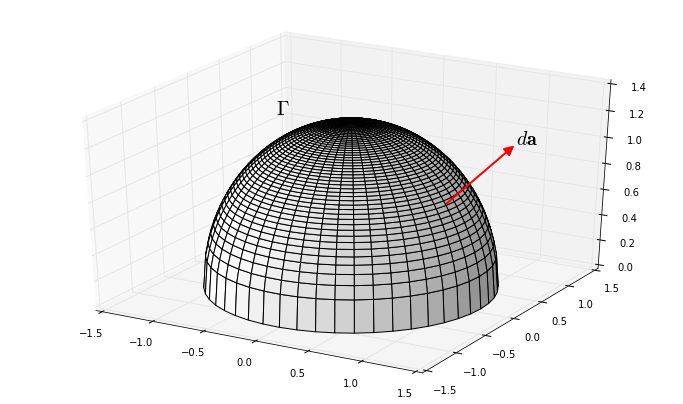

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations

fig = plt.figure(figsize=(12.0,7.0))
ax = fig.gca(projection='3d')

r = np.linspace(0,1.25,50)
p = np.linspace(0,2*np.pi,50)
R,P = np.meshgrid(r,p)
# transform them to cartesian system
X,Y = R*np.cos(P),R*np.sin(P)

#Z = ((R**2 - 1)**2)
Z = np.sqrt(1.25**2-R**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,color='white')#, cmap=cm.jet)

#draw a point
font = FontProperties()
#font = font0.copy()
font.set_size(20)
ax.text(-1.2,0.8,1.0,'$\Gamma$',fontproperties=font)

#draw a vector
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
v=1/np.sqrt(3.0)
a = Arrow3D([v,1],[v,1],[v,1], mutation_scale=20, lw=2, arrowstyle="-|>", color="red")
ax.text(1.0,1.0,1.0,'$d{\\bf a}$',fontproperties=font)
ax.add_artist(a)
plt.show()

The vector field is defined everywhere, so in particular on the surface $\Gamma$. An important integral is the one obtained by summing all the inner products of $d{\bf a}$ and ${\bf E}(\bfr, t)$ taken at the patch, in formula:
$$
\iint_{\Gamma} {\bf E} \cdot d{\bf a}.
$$
For this integral, a theorem exists (which we shall not prove here) relating this surface integral to a volume integral over the divergence of the vector field:
$$
\iint_{\Gamma} {\bf E} \cdot d{\bf a} = \iiint_{\Omega}  \boldsymbol{\nabla} \cdot \bfE\; d^3r.
$$


#Integrals along a loop: Stokes Theorem

Now we consider an integral over a closed loop on some surface. For simplicity, we imagine that the loop $L$ is a closed curve in a 3D space. Suppose that throughout this space, there exists a vector field $\newcommand{\bfB}{{\bf B}}$. So this vector field lives in particular on the loop $L$. It turns out that a useful theorem exists for evaluating an integral taken along the loop and involving the vector field. This theorem is important in electromagnetism and fluid mechanics -- it is called *Stokes' theorem*. Stokes' theorem involves the outer product between the gradient operator $\boldsymbol{\nabla}$ and the vector field $\bfB$, also called eth *curl* of $\bfB$: 
$$
\boldsymbol{\nabla} \bfB = {\rm curl} \bfB.
$$

Let us first define the integral intuitively. We chop the loop $L$ up into many small line segments $\newcommand{\bfl}{{\bf l}}$ $d\bfl$ which are vectors, the norm of which corresponds to the length of the segment, and their orientation also corresponds to that of the segment.

Just as in the case of the surface integral, we define the integral $I$ as the sum of the inner products of each segment vector and the field at the segment, in formula:
$$
I = \oint_L \bfB \cdot d\bfl.
$$
(the symbol $\oint$ indicates that the integral is over a *closed* loop). 

Stokes' theorem relates this to an integral over the surface $\Gamma$ enclosed by $L$. Looking into this, you may object that this area is not uniquely defined: $L$ may bound many different surfaces. It turns out that Stokes' theorem is independent of the surface shape provided the fields are smooth functions of the position $\bfr$. 


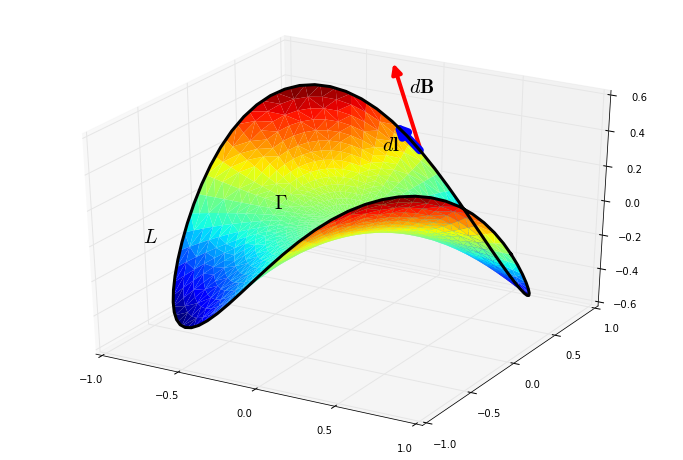

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

n_angles = 72
n_radii = 16

# An array of radii
# Does not include radius r=0, this is to eliminate duplicate points
radii = np.linspace(0.125, 1.0, n_radii)

# An array of angles
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius
angles = np.repeat(angles[...,np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords
# (0, 0) is added here. There are no duplicate points in the (x, y) plane
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Pringle surface
z = np.sin(-x*y)

fig = plt.figure(figsize=(12.0, 8.0))
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.0)

angles = np.linspace(0, 2*np.pi, n_angles, endpoint=True)
R=np.array(1.0)
X = np.append(0, (R*np.cos(angles)))
Y = np.append(0, (R*np.sin(angles)))
Z = np.sin(-X*Y)
font.set_size(20)
ax.text(-0.83,-0.83,0.0,'$L$',fontproperties=font)
ax.text(-0.5,-0.0,0.0,'$\Gamma$',fontproperties=font)
ax.text(X[23], Y[20], Z[20]-0.03,'$d{\\bf l}$',fontproperties=font)
ax.text(X[21], Y[20], Z[20]+0.33,'$d{\\bf B}$',fontproperties=font)
a = Arrow3D(X[20:23:2], Y[20:23:2],Z[20:23:2], mutation_scale=20, lw=8, arrowstyle="-|>", color="blue")
b = Arrow3D(X[20:23:2], Y[20:23:2],[Z[20], Z[20]+0.5], mutation_scale=20, lw=4, arrowstyle="-|>", color="red")
ax.plot(X[1:], Y[1:], Z[1:], lw=3, color='black')
ax.add_artist(b)
ax.add_artist(a)

plt.show()

So what does the theorem say? We now chop the area $\Gamma$ up into many very small surface segments, which are each characterized by their normal vector $d{\bf a}$, whose norm equals the corresponding infinitesimal surface area. The we add the inner products of the curl of $\bf B$ with each $d{\bf a}$ at the corresponding area segment to arrive at an surface integral which equals the line integral just introduced:
$$
\iint_\Gamma \left( \boldsymbol{\nabla} \times \bfB \right) \cdot d{\bf a}.
$$
This is Stokes' theorem.


#Green's theorem
We can prove this theorem starting from the divergence theorem. Recall that this theorem read:
$$
\iint_{\Gamma} {\bf E} \cdot d{\bf a} = \iiint_{\Omega}  \boldsymbol{\nabla} \cdot \bfE\; d^3r.
$$
Now we take $\bfE$ to be 
$$
\bfE = \phi \boldsymbol{\nabla} \psi
$$
where $\phi$ and $\psi$ are scalar functions depending on $\bfr$.
The divergence occuring in the left hand side of the divergence theorem is
$$
\boldsymbol{\nabla} \cdot \left( \phi \boldsymbol{\nabla} \psi \right) = \boldsymbol{\nabla} \phi \cdot \boldsymbol{\nabla} \psi +
\phi  \nabla^2 \psi.
$$
The right hand side of the divergence theorem involves $\phi \boldsymbol{\nabla} \psi$ which we can write as 
$\phi \frac{\partial \psi}{\partial n}.$
So we directly arrive at *Green's first identity*:
$$
\iiint_\Omega \left( \boldsymbol{\nabla} \phi \cdot \boldsymbol{\nabla} \psi +
\phi  \nabla^2 \psi \right) d^3r  = \int_\Gamma \phi \frac{\partial \psi}{\partial n} da.
$$
Here, as usual, $da$ denotes the infinitesimal area of the surface elements composing the surface $\Gamma$.
The result we have obtained is known as *Green's first identity*.

Nothing would prevent us from interchanging $\phi$ and $\psi$ in the derivation of Green's first identity. Subtracting from the form obtained above the same result with $\phi$ and $\psi$ interchanged, we arrive at *Green's theorem*:
$$
\iiint_\Omega \left( \psi \nabla^2 \phi -
\phi  \nabla^2 \psi \right) d^3r  = \int_\Gamma \left[ \psi \frac{\partial \phi}{\partial n} - \phi \frac{\partial \psi}{\partial n} \right] da.
$$


#Problems
1. We consider the *Gamma-function*, which is defined as $$ \Gamma(t) = \int_0^\infty x^{t-1} e^{-x} dx.$$
   Calculate $\Gamma(0)$ and $\Gamma(1)$.
   
   Derive a recursion relation between $\Gamma(t)$ and $\Gamma(t-1)$ (Use partial integration).
   
   Show that for integer $t=n$, $\Gamma(n) = (n-1)!$. 

2. Calculate 
   $$ \int \frac{\sin(2x)}{1 + 4 \sin^2 x} dx.$$

3. Calculate (i)
   $$ \int_0^\infty x e^{-x} dx $$ and (ii) $$\int_{-\infty}^\infty \frac{x^2 + 9 x + 14} dx.$$

5. Let $f(x,y)$ be a continuous function which is symmetric, i.e. $f(x,y)= f(y,x)$. Calculate 
  $$ \int_a^b dx \int_a^b dy\; f(x,y) sin(x-y).
  $$

6. Determine the integral
 $$
 I_n = \int e^{-(x_1^2+x_2^2 + \cdots + x_N^2)} dx_1 dx_2 \ldots dx_N 
 $$
 directly and using polar coordinates in order to find for the area of a sphere in $N$ dimensions:
 $$
 S_n = \frac{(2\pi)^{N/2}}{\Gamma(N/2)},
 $$
 where $\Gamma(x)$ is the well-known gamma-function:
 
7. Consider a Gaussian statistical distribution: 
  $$ P(x) = \sqrt{\frac{\alpha}{\pi}} e^{-\alpha x^2}.
  $$
  The *moments* $M(n)$ of such a distribution are defined as 
  $$ M_n = \frac{ \int x^n e^{-\alpha x^2} dx}{\int e^{-\alpha x^2} dx}.
  $$
  
  Show that $M(n)$ for odd values of $n$.
  
  Calculate $M(0)$, $M(2)$ and $M(4)$. 
8. Calculate the integral $$I = \int_0^\{\pi/2} \sin^{(2n)} \theta \cos^{2n+1} \theta \; d\theta$$.
   Use the integral in polar coordinates:
   $$ \int_0^\infty r dr \int_0^{\pi/2} d\theta (r\sin\theta)^{2n} (r\cos\theta)^{2n+1} e^{-r^2}.$$
      
